**UNZIPPING THE LOADED DATASET**

In [47]:
from io import BytesIO
import zipfile

zip_ref = zipfile.ZipFile(BytesIO(streaming_body.read()), 'r')
zip_ref.extractall('home/wsuser/work/')
zip_ref.close()

**IMAGE DATA GENERATION AND PREPROCESSING**

In [63]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = [.99,1.01],brightness_range = [0.8,1.2],data_format = "channels_last",fill_mode = "constant", horizontal_flip = True,validation_split=0.2)

training_set = train_datagen.flow_from_directory('/home/wsuser/work/home/wsuser/work/dataset/train',target_size = (180,180),batch_size = 64,class_mode = 'categorical',subset = 'training')
test_set = train_datagen.flow_from_directory('/home/wsuser/work/home/wsuser/work/dataset/train',target_size = (180,180),batch_size = 64,class_mode = 'categorical',subset = 'validation')




Found 1225 images belonging to 5 classes.
Found 304 images belonging to 5 classes.


**ADDING A PRETRAINED MODEL VGG19 AS A FEATURE EXTRACTOR**

In [65]:
IMAGE_SIZE = [180,180]
VGG19 = VGG19(input_shape= IMAGE_SIZE+[3],weights = 'imagenet',include_top = False)
for layer in VGG19.layers:
  layer.trainable = False
x = Flatten()(VGG19.output)

80134624/80134624 [==============================] - 1s 0us/step


In [66]:
prediction = Dense(5,activation = 'softmax')(x)
model = Model(inputs = VGG19.input,outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**TRAINING THE MODEL**

In [67]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
r = model.fit(training_set,validation_data = test_set,epochs = 50,steps_per_epoch = len(training_set),validation_steps = len(test_set))
loss,accuracy = model.evaluate(test_set,steps = 11,verbose = 2,use_multiprocessing=True,workers=2)
print(f'model performance on test images:\n Accuracy = {accuracy}\n Loss = {loss}')






Epoch 1/50
20/20 [==============================] - 313s 16s/step - loss: 1.1747 - accuracy: 0.5273 - val_loss: 0.9285 - val_accuracy: 0.6349
Epoch 2/50
20/20 [==============================] - 310s 16s/step - loss: 0.6085 - accuracy: 0.7992 - val_loss: 0.6189 - val_accuracy: 0.7599
Epoch 3/50
20/20 [==============================] - 328s 17s/step - loss: 0.4531 - accuracy: 0.8588 - val_loss: 0.5565 - val_accuracy: 0.8092
Epoch 4/50
20/20 [==============================] - 310s 16s/step - loss: 0.4101 - accuracy: 0.8686 - val_loss: 0.6570 - val_accuracy: 0.7566
Epoch 5/50
20/20 [==============================] - 310s 16s/step - loss: 0.3273 - accuracy: 0.9069 - val_loss: 0.5346 - val_accuracy: 0.8191
Epoch 6/50
20/20 [==============================] - 310s 16s/step - loss: 0.3088 - accuracy: 0.9127 - val_loss: 0.4801 - val_accuracy: 0.8125
Epoch 7/50
20/20 [==============================] - 312s 16s/step - loss: 0.2721 - accuracy: 0.9135 - val_loss: 0.4375 - val_accuracy: 0.8454
Epoch 

In [68]:
model.save('wcv.h5')

**TESTING IT WITH RANDOM IMAGE FROM THE TEST DATASET**

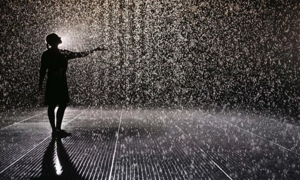

1/1 [==============================] - 0s 324ms/step
rainy


In [77]:
from tensorflow.keras.preprocessing import image
from PIL import Image
im = Image.open(r"/home/wsuser/work/home/wsuser/work/dataset/TEST/rain_2.png") 
im = im.resize((300,180))
im.show()
model = load_model("/home/wsuser/wcv.h5")
img = image.load_img("/home/wsuser/work/home/wsuser/work/dataset/TEST/rain_2.png",target_size = (180,180))

x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds = model.predict(x)
pred = np.argmax(preds,axis = 1)
index = ['cloudy','foggy','rainy','sunshine','sunrise']
result = str(index[pred[0]])
print(result)

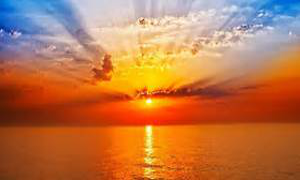

1/1 [==============================] - 0s 316ms/step
sunrise


In [80]:
im = Image.open(r"/home/wsuser/work/home/wsuser/work/dataset/TEST/sunrise_1.jpg") 
im = im.resize((300,180))
im.show()
model = load_model("/home/wsuser/wcv.h5")
img = image.load_img("/home/wsuser/work/home/wsuser/work/dataset/TEST/sunrise_1.jpg",target_size = (180,180))

x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds = model.predict(x)
pred = np.argmax(preds,axis = 1)
index = ['cloudy','foggy','rainy','sunshine','sunrise']
result = str(index[pred[0]])
print(result)